# EDA Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) #Adjusts the configuration of the plots 

## Data preparation and Cleaning
1. Read the file
2. Look at some information about the data features
3. Fix any missing values

In [4]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv') # Read the file

In [6]:
df.head() # Look at the first few records

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [20]:
df.describe() # Look at descriptive statistics

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count 2845342.00000 2845342.00000 2845342.00000 2845342.00000 2845342.00000   
mean        2.13757      36.24520     -97.11463      36.24532     -97.11439   
std         0.47872       5.36380      18.31782       5.36387      18.31763   
min         1.00000      24.56603    -124.54807      24.56601    -124.54575   
25%         2.00000      33.44517    -118.03311      33.44628    -118.03333   
50%         2.00000      36.09861     -92.41808      36.09799     -92.41772   
75%         2.00000      40.16024     -80.37243      40.16105     -80.37338   
max         4.00000      49.00058     -67.11317      49.07500     -67.10924   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count 2845342.00000 1101431.00000   2776068.00000  2375699.00000   
mean        0.70268    8089.40811        61.79356       59.65823   
std         1.56036   18360.09399        18.62263       21.16097   
min         0.00000       0.00000       -89.00000      -89.00000   
25%         0.05200    1270.00000        50.00000       46.00000   
50%         0.24400    4007.00000        64.00000       63.00000   
75%         0.76400    9567.00000        76.00000       76.00000   
max       155.18600 9999997.00000       196.00000      196.00000   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count 2772250.00000 2786142.00000   2774796.00000    2687398.00000   
mean       64.36545      29.47234         9.09939          7.39504   
std        22.87457       1.04529         2.71755          5.52745   
min         1.00000       0.00000         0.00000          0.00000   
25%        48.00000      29.31000        10.00000          3.50000   
50%        67.00000      29.82000        10.00000          7.00000   
75%        83.00000      30.01000        10.00000         10.00000   
max       100.00000      58.90000       140.00000       1087.00000   

       Precipitation(in)  
count      2295884.00000  
mean             0.00702  
std              0.09349  
min              0.00000  
25%              0.00000  
50%              0.00000  
75%              0.00000  
max             24.00000

In [23]:
# Check for number of numeric columns in the dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

<AxesSubplot:>

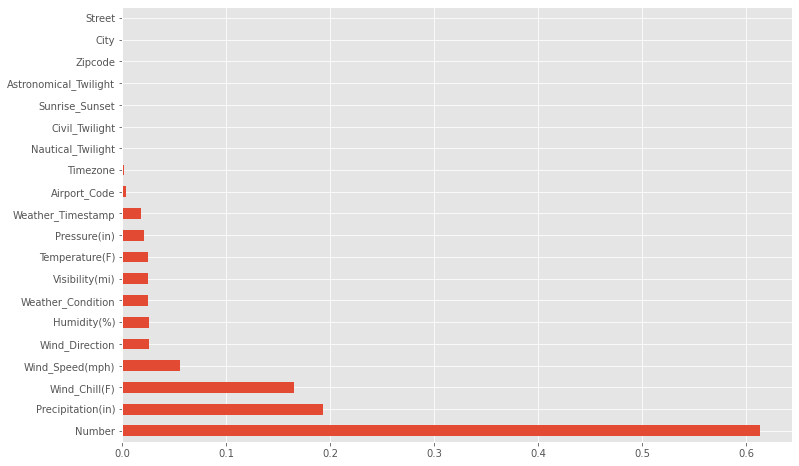

In [36]:
# Check for percentage of missing values
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages = missing_percentages[missing_percentages!=0]
missing_percentages.plot(kind= 'barh')

## Exploratory Analysis and Visualisation

In [38]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### columns we will analyze
- City
- Start Time
- Start_Lat, Start_Lng
- Temperature(F)
- Weather_Condition


### City

In [111]:

cities_unique = df.City.unique()
len(cities_unique)

11682

In [51]:
cities_byaccident = df.City.value_counts() # Check the number of accidents per city
cities_byaccident[:20] # Look at the top 20 cities with higest number of accidents

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [81]:
type(cities_byaccident)

pandas.core.series.Series

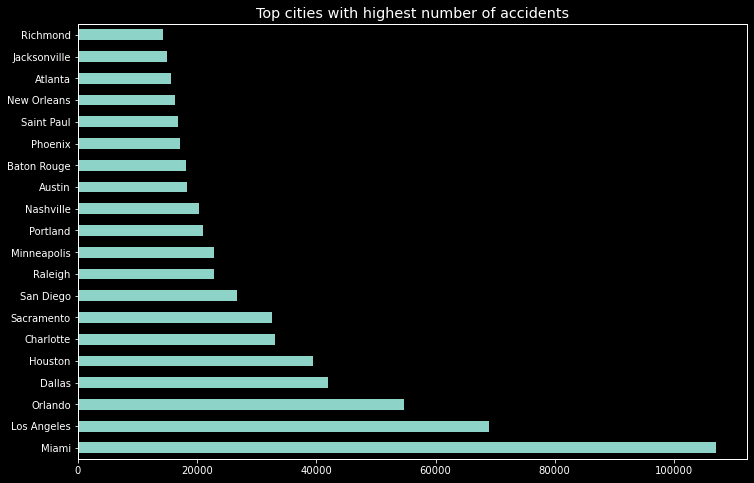

In [77]:
cities_byaccident[:20].plot(kind ='barh', grid = False) # Plotting a bar graph 
plt.title('Top cities with highest number of accidents')
plt.show()


In [80]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

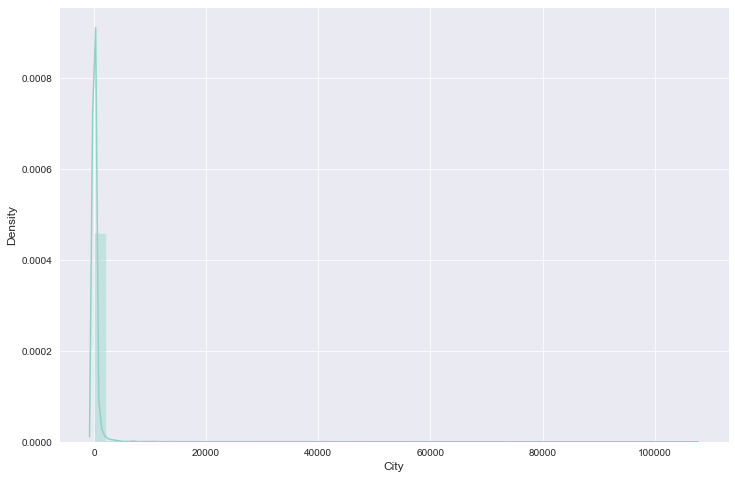

In [103]:
sns.distplot(cities_byaccident)

In [97]:
high_accident_cities = cities_byaccident[cities_byaccident >= 1000]
low_accident_cities = cities_byaccident[cities_byaccident < 1000]

In [108]:
len(high_accident_cities)
len(high_accident_cities)/len(cities_unique)*100 # Percentage of high accident cities

4.245848313644924

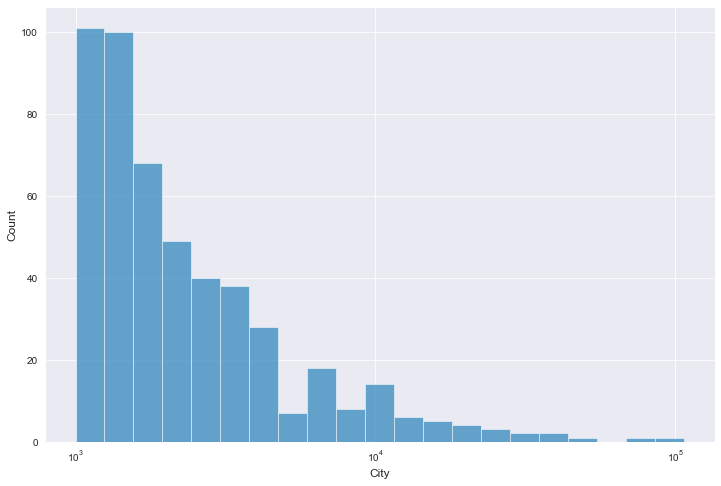

In [110]:
sns.histplot(high_accident_cities, log_scale = True)
plt.show()

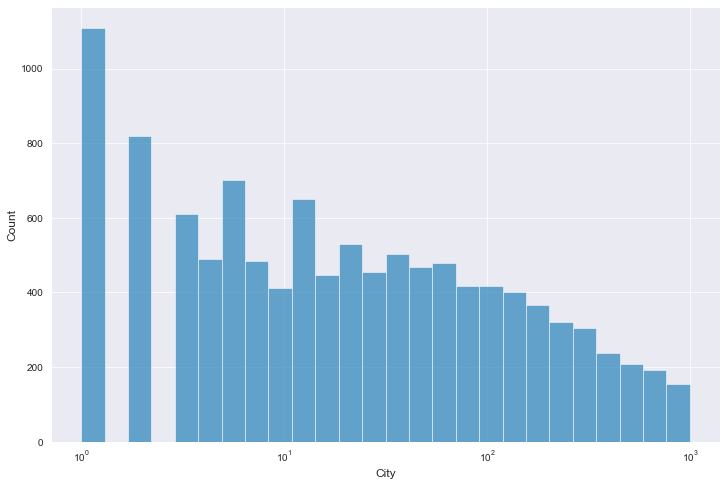

In [109]:
sns.histplot(low_accident_cities, log_scale = True)
plt.show()

In [107]:
len(cities_byaccident[cities_byaccident == 1]) # Only 1 accident has been reported in 1110 cities

1110

### Start Time

In [114]:
df.Start_Time = pd.to_datetime(df.Start_Time)

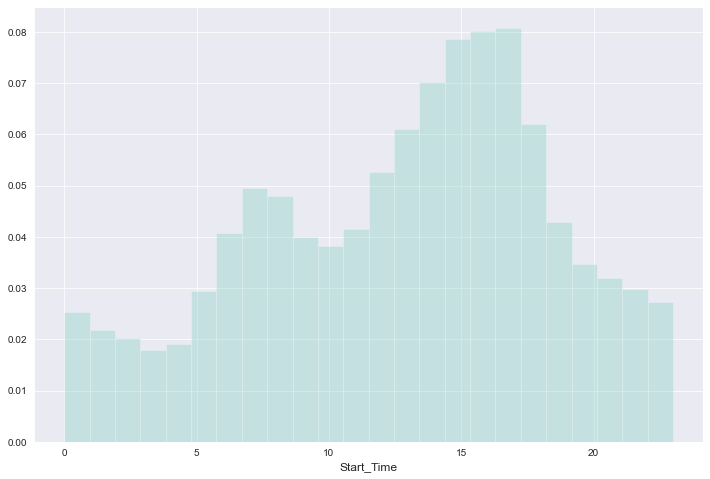

In [127]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist= True)
plt.show()
# A high percentage of accidents occur between 3.00 pm - 6.00 pm and 6.00 am to 9.00 pm

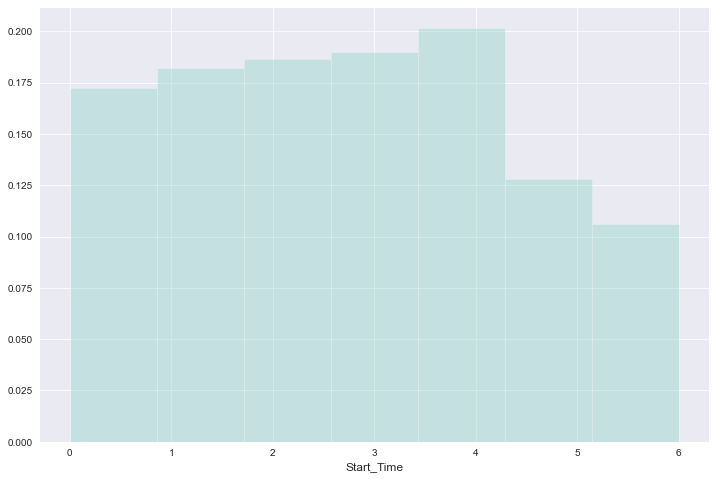

In [130]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)
plt.show()

In [131]:
# Is the distribution of accidents by hour the same on weekends as on weekdays

<AxesSubplot:xlabel='Start_Time'>

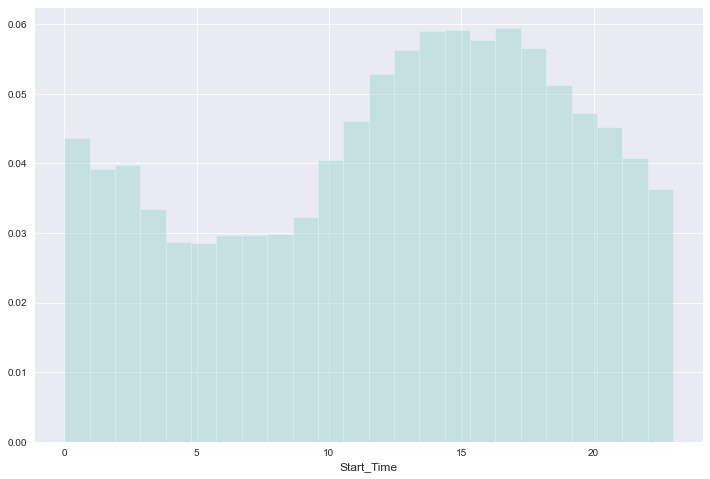

In [154]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6] # Checking for sundays
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist= True)

# On sundays the peak occurs between 11.00 am and 6.00 pm unlike weekdays

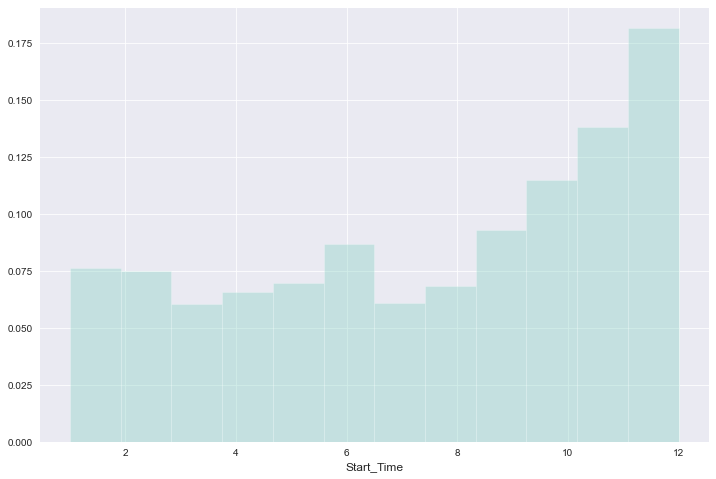

In [144]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True) # Check the monthwise trend of accidents
plt.show()
# Data is missing for 2016 and maybe some of 2017

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


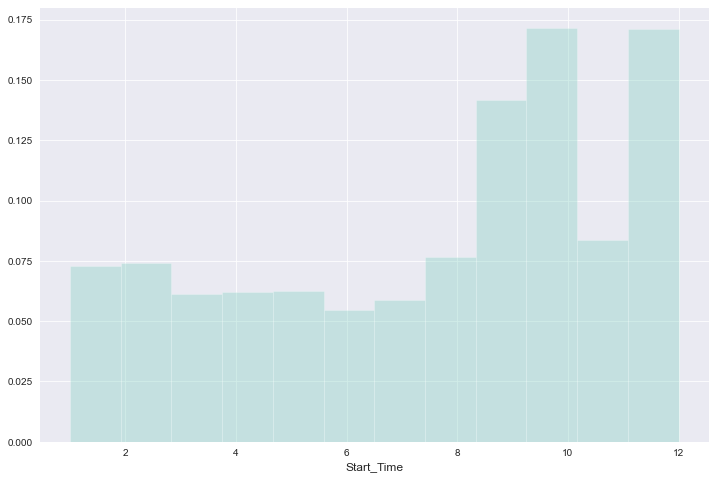

In [163]:
sns.distplot(df_2019. Start_Time.dt.month, bins = 12, kde = False, norm_hist= True) # Check the monthwise trend for 2019
plt.show()

### Start Latitude and Longitude

In [173]:
df.Start_Lat

0         40.10891
1         39.86542
2         39.10266
3         41.06213
4         39.17239
            ...   
2845337   34.00248
2845338   32.76696
2845339   33.77545
2845340   33.99246
2845341   34.13393
Name: Start_Lat, Length: 2845342, dtype: float64

In [175]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -81.53784
4          -84.49279
             ...    
2845337   -117.37936
2845338   -117.14806
2845339   -117.84779
2845340   -118.40302
2845341   -117.23092
Name: Start_Lng, Length: 2845342, dtype: float64

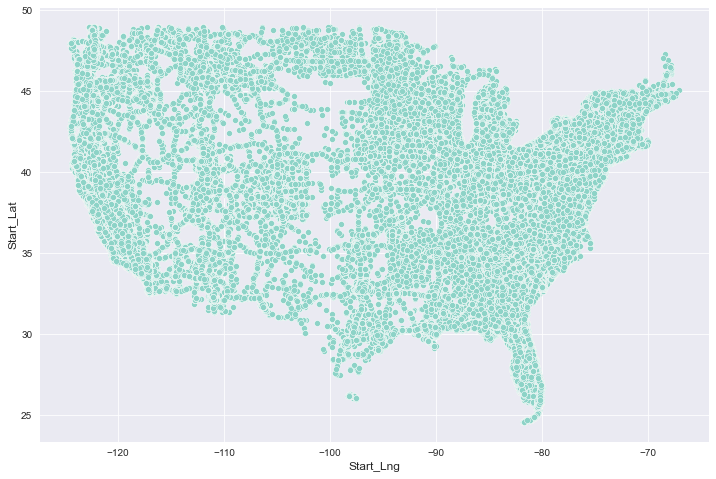

In [178]:
sns.scatterplot(x= df.Start_Lng, y = df.Start_Lat) # Look at the scatterplot 
plt.show()

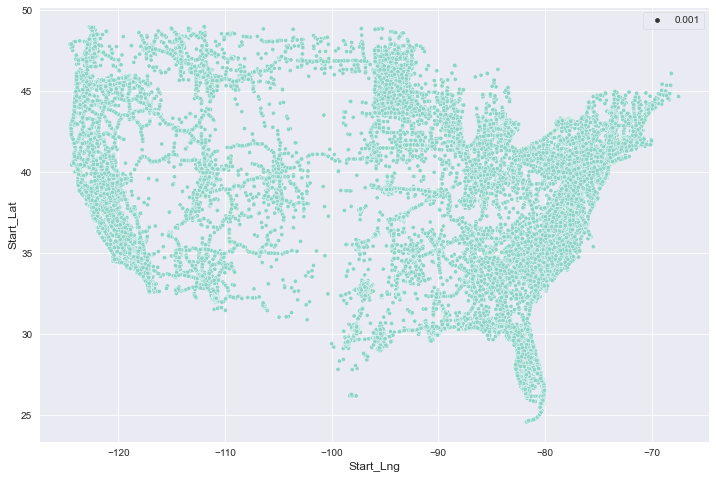

In [182]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)
plt.show()

In [184]:
!pip install folium

In [196]:
import folium

In [191]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [203]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2175466   37.99001
1384434   38.60213
2685840   33.66903
108950    32.74447
1286497   25.75530
            ...   
2168885   28.62532
2407060   43.63778
2401103   40.71857
2061621   33.35618
852958    41.09381
Name: Start_Lat, Length: 100, dtype: float64
2175466   -122.13386
1384434   -109.57522
2685840   -112.12274
108950    -117.15624
1286497    -80.41681
             ...    
2168885    -81.38679
2407060    -95.58895
2401103   -112.05689
2061621   -117.53052
852958     -73.93239
Name: Start_Lng, Length: 100, dtype: float64


In [206]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [199]:
from folium.plugins import HeatMap

In [208]:
sample_df = df.sample(int(0.1 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [209]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Summary & Insights
1. Less than 5% cities have more than 1000 accidents
2. 1110 cities have reported only one accident 
3. No. of accidents per city decreases exponentially